In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay,confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('D:/Data Analysis/titanic/file/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [322]:
df.shape

(891, 12)

In [323]:
df.size

10692

In [324]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [325]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [326]:
for i in range(len(df.isna().sum())):
    if df.isna().sum()[i]>0:
        print("Total no of missing values in "+df.isna().sum().index[i]+':',df.isna().sum()[i])

Total no of missing values in Age: 177
Total no of missing values in Cabin: 687
Total no of missing values in Embarked: 2


In [327]:
df=df.drop(columns='Cabin',axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [328]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [329]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [330]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [331]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

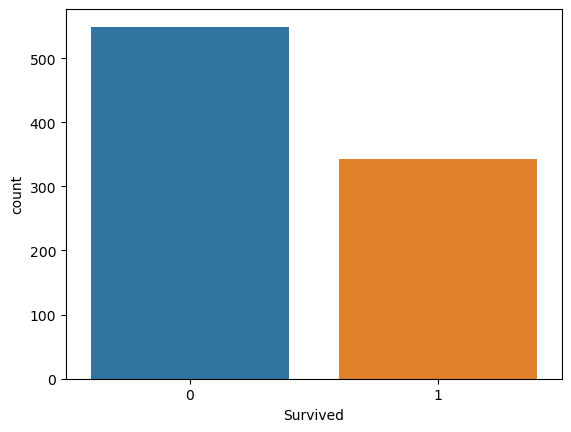

In [332]:
sns.countplot('Survived',data=df)

In [333]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

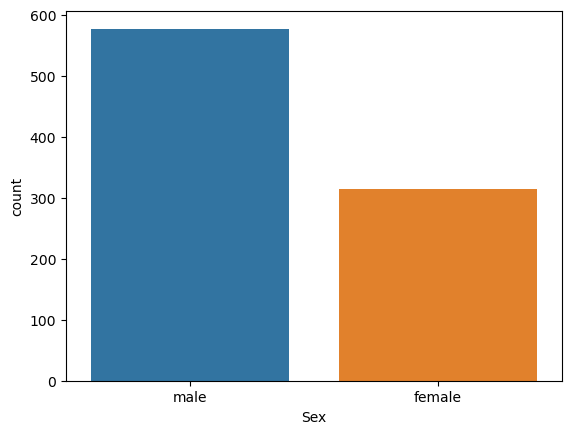

In [334]:
sns.countplot('Sex',data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

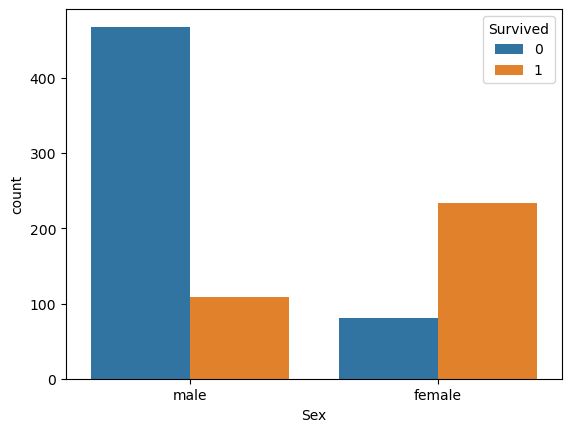

In [335]:
sns.countplot('Sex',hue='Survived',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

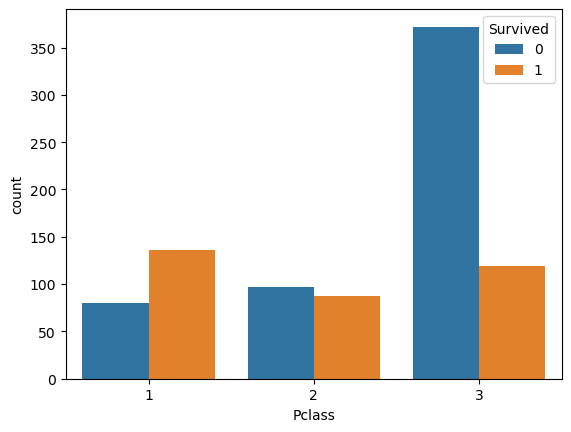

In [336]:
sns.countplot('Pclass',hue='Survived',data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

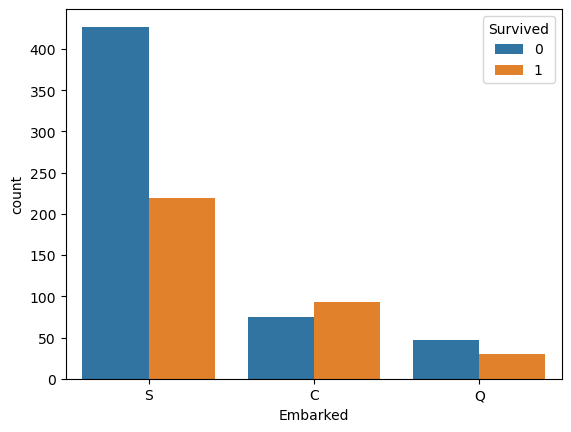

In [337]:
sns.countplot('Embarked',hue='Survived',data=df)

In [338]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [339]:
#Converting categorical columns
df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [340]:
#Seperating features and target
df=df.drop(columns=['PassengerId','Name','Ticket'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [341]:
x=df.iloc[:,1:].values
y=df.iloc[:,0].values
x

array([[ 3.        ,  0.        , 22.        , ...,  0.        ,
         7.25      ,  0.        ],
       [ 1.        ,  1.        , 38.        , ...,  0.        ,
        71.2833    ,  1.        ],
       [ 3.        ,  1.        , 26.        , ...,  0.        ,
         7.925     ,  0.        ],
       ...,
       [ 3.        ,  1.        , 29.69911765, ...,  2.        ,
        23.45      ,  0.        ],
       [ 1.        ,  0.        , 26.        , ...,  0.        ,
        30.        ,  1.        ],
       [ 3.        ,  0.        , 32.        , ...,  0.        ,
         7.75      ,  2.        ]])

In [342]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)
x_train

array([[ 3.        ,  0.        , 29.69911765, ...,  0.        ,
        23.25      ,  2.        ],
       [ 1.        ,  1.        , 30.        , ...,  0.        ,
        56.9292    ,  1.        ],
       [ 2.        ,  1.        , 34.        , ...,  0.        ,
        10.5       ,  0.        ],
       ...,
       [ 2.        ,  0.        , 21.        , ...,  0.        ,
        73.5       ,  0.        ],
       [ 3.        ,  1.        , 29.69911765, ...,  0.        ,
         7.55      ,  0.        ],
       [ 3.        ,  0.        , 21.        , ...,  0.        ,
         8.05      ,  0.        ]])

In [343]:
print(x.shape,x_train.shape,x_test.shape)

(891, 7) (712, 7) (179, 7)


In [344]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[ 0.83659324, -0.73334642, -0.02810499, ..., -0.478173  ,
        -0.18801432,  2.54486995],
       [-1.55559305,  1.36361202, -0.00541218, ..., -0.478173  ,
         0.53969044,  0.98687562],
       [-0.35949991,  1.36361202,  0.29627125, ..., -0.478173  ,
        -0.46350293, -0.57111871],
       ...,
       [-0.35949991, -0.73334642, -0.6841999 , ..., -0.478173  ,
         0.89773487, -0.57111871],
       [ 0.83659324,  1.36361202, -0.02810499, ..., -0.478173  ,
        -0.52724343, -0.57111871],
       [ 0.83659324, -0.73334642, -0.6841999 , ..., -0.478173  ,
        -0.51643995, -0.57111871]])

In [345]:
models=[KNeighborsClassifier(n_neighbors=7),GaussianNB(),SVC(),LogisticRegression()]

for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_test,y_pred)*100
    print("{}:{}".format(model,score),end='\n\n')

KNeighborsClassifier(n_neighbors=7):77.6536312849162

GaussianNB():77.09497206703911

SVC():77.09497206703911

LogisticRegression():79.88826815642457



              precision    recall  f1-score   support

           0       0.74      0.94      0.83       106
           1       0.86      0.52      0.65        73

    accuracy                           0.77       179
   macro avg       0.80      0.73      0.74       179
weighted avg       0.79      0.77      0.76       179



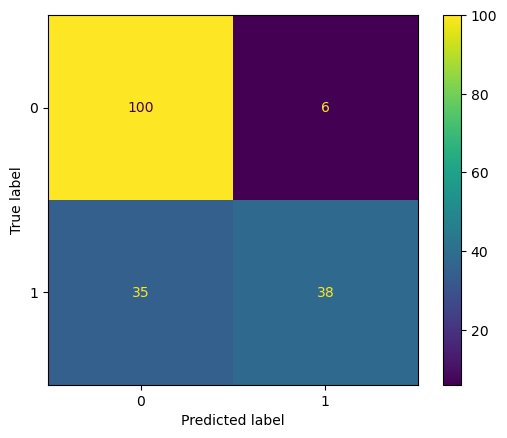

In [346]:
# SVC
model1=models[2] 
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
report=classification_report(y_test,y_pred1)
cmd=ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)
print(report)
cmd

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       106
           1       0.76      0.74      0.75        73

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



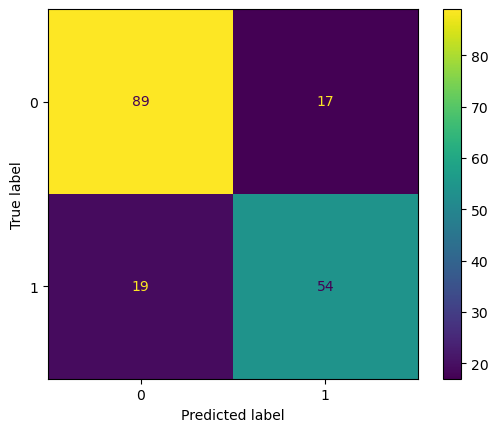

In [347]:
# Logistic Regression
model2=models[3] 
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
report=classification_report(y_test,y_pred2)
cmd=ConfusionMatrixDisplay.from_predictions(y_test,y_pred2)
print(report)
cmd